<a href="https://colab.research.google.com/github/SrinithiReshma/info/blob/master/nsl_random_and_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


In [17]:
# Load dataset
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'
col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
             "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
             "root_shell","su_attempted","num_root","num_file_creations","num_shells",
             "num_access_files","is_host_login","is_guest_login","count","srv_count",
             "serror_rate","srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

train = pd.read_csv(train_url, header=None, names=col_names)
test = pd.read_csv(test_url, header=None, names=col_names)

# Convert labels into binary (normal or anomalous)
train['label'] = train['label'].apply(lambda x: 'normal' if x == 'normal' else 'anomalous')
test['label'] = test['label'].apply(lambda x: 'normal' if x == 'normal' else 'anomalous')

# Label encoding for categorical features
def LabelEncoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])

LabelEncoding(train)
LabelEncoding(test)


In [18]:
# Split into features and labels
X_train = train.drop(columns=['label'])
y_train = train['label']
X_test = test.drop(columns=['label'])
y_test = test['label']


In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [20]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [21]:
# Random Forest Metrics
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, pos_label=1, average='binary')
rf_recall = recall_score(y_test, rf_pred, pos_label=1, average='binary')
rf_cm = confusion_matrix(y_test, rf_pred)

print(f'Random Forest Accuracy: {rf_accuracy:.4f}')
print(f'Random Forest Precision: {rf_precision:.4f}')
print(f'Random Forest Recall: {rf_recall:.4f}')
print('Random Forest Confusion Matrix:')
print(rf_cm)


Random Forest Accuracy: 0.7802
Random Forest Precision: 0.6683
Random Forest Recall: 0.9722
Random Forest Confusion Matrix:
[[8148 4685]
 [ 270 9441]]


In [22]:
# KNN Metrics
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred, pos_label=1, average='binary')
knn_recall = recall_score(y_test, knn_pred, pos_label=1, average='binary')
knn_cm = confusion_matrix(y_test, knn_pred)

print(f'KNN Accuracy: {knn_accuracy:.4f}')
print(f'KNN Precision: {knn_precision:.4f}')
print(f'KNN Recall: {knn_recall:.4f}')
print('KNN Confusion Matrix:')
print(knn_cm)


KNN Accuracy: 0.7772
KNN Precision: 0.6657
KNN Recall: 0.9697
KNN Confusion Matrix:
[[8104 4729]
 [ 294 9417]]


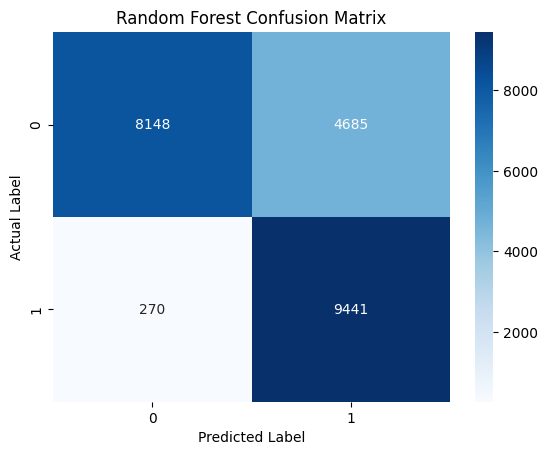

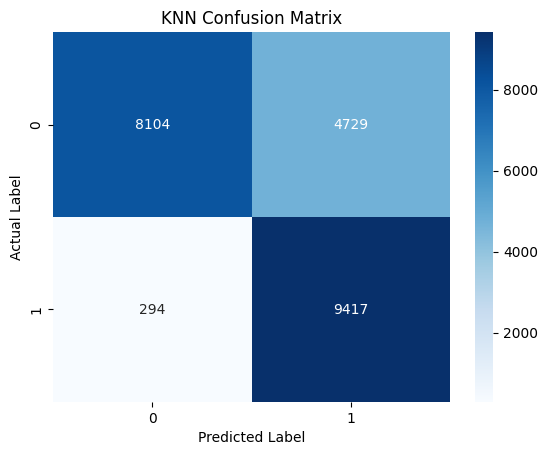

In [23]:
# Confusion Matrix Plot for Random Forest
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Confusion Matrix Plot for KNN
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()
